In [318]:
!poetry add ucimlrepo

The following packages are already present in the pyproject.toml and will be skipped:

  - ucimlrepo

If you want to update it to the latest compatible version, you can use `poetry update package`.
If you prefer to upgrade it to the latest available version, you can use `poetry add package@latest`.

Nothing to add.


In [319]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd

#### Variables

##### Variables de entrada (Características):

1. **school**: Escuela del estudiante (binario: 'GP' - Gabriel Pereira o 'MS' - Mousinho da Silveira)
2. **sex**: Sexo del estudiante (binario: 'F' - femenino o 'M' - masculino)
3. **age**: Edad del estudiante (numérico: de 15 a 22)
4. **address**: Tipo de dirección del hogar del estudiante (binario: 'U' - urbano o 'R' - rural)
5. **famsize**: Tamaño de la familia (binario: 'LE3' - menor o igual a 3 o 'GT3' - mayor de 3)
6. **Pstatus**: Estado de cohabitación de los padres (binario: 'T' - viven juntos o 'A' - separados)
7. **Medu**: Nivel educativo de la madre (numérico: 0 - ninguno, 1 - primaria (4º grado), 2 - secundaria incompleta (5º a 9º grado), 3 - secundaria completa o 4 - educación superior)
8. **Fedu**: Nivel educativo del padre (numérico: 0 - ninguno, 1 - primaria (4º grado), 2 - secundaria incompleta (5º a 9º grado), 3 - secundaria completa o 4 - educación superior)
9. **Mjob**: Ocupación de la madre (nominal: 'teacher' - profesora, 'health' - relacionada con la salud, 'services' - servicios civiles (ej. administrativa o policía), 'at_home' - en casa o 'other' - otra)
10. **Fjob**: Ocupación del padre (nominal: 'teacher' - profesor, 'health' - relacionada con la salud, 'services' - servicios civiles (ej. administrativa o policía), 'at_home' - en casa o 'other' - otra)
11. **reason**: Razón para elegir esta escuela (nominal: 'home' - cerca de casa, 'reputation' - reputación de la escuela, 'course' - preferencia por el curso o 'other' - otra)
12. **guardian**: Guardián del estudiante (nominal: 'mother' - madre, 'father' - padre o 'other' - otro)
13. **traveltime**: Tiempo de viaje desde casa a la escuela (numérico: 1 - menos de 15 min., 2 - de 15 a 30 min., 3 - de 30 min. a 1 hora o 4 - más de 1 hora)
14. **studytime**: Tiempo de estudio semanal (numérico: 1 - menos de 2 horas, 2 - de 2 a 5 horas, 3 - de 5 a 10 horas o 4 - más de 10 horas)
15. **failures**: Número de fallos en cursos anteriores (numérico: n si 1 <= n < 3, de lo contrario 4)
16. **schoolsup**: Apoyo educativo adicional (binario: 'yes' - sí o 'no' - no)
17. **famsup**: Apoyo educativo familiar (binario: 'yes' - sí o 'no' - no)
18. **paid**: Clases pagadas adicionales dentro del curso (binario: 'yes' - sí o 'no' - no)
19. **activities**: Actividades extracurriculares (binario: 'yes' - sí o 'no' - no)
20. **nursery**: Asistencia a la guardería (binario: 'yes' - sí o 'no' - no)
21. **higher**: Deseo de estudiar en la educación superior (binario: 'yes' - sí o 'no' - no)
22. **internet**: Acceso a Internet en casa (binario: 'yes' - sí o 'no' - no)
23. **romantic**: Tiene una relación romántica (binario: 'yes' - sí o 'no' - no)
24. **famrel**: Calidad de las relaciones familiares (numérico: de 1 - muy malas a 5 - excelentes)
25. **freetime**: Tiempo libre después de la escuela (numérico: de 1 - muy bajo a 5 - muy alto)
26. **goout**: Frecuencia de salir con amigos (numérico: de 1 - muy bajo a 5 - muy alto)
27. **Dalc**: Consumo de alcohol entre semana (numérico: de 1 - muy bajo a 5 - muy alto)
28. **Walc**: Consumo de alcohol en fines de semana (numérico: de 1 - muy bajo a 5 - muy alto)
29. **health**: Estado de salud actual (numérico: de 1 - muy malo a 5 - muy bueno)
30. **absences**: Número de ausencias en la escuela (numérico: de 0 a 93)

##### Variables objetivo (calificaciones):

1. **G1**: Calificación del primer período (numérico: de 0 a 20)
2. **G2**: Calificación del segundo período (numérico: de 0 a 20)
3. **G3**: Calificación final (numérico: de 0 a 20, es la variable objetivo que quieres predecir)

Con esto, puedes tener un panorama claro de qué representa cada variable. ¿Tienes alguna duda adicional?

### **1. Regresión lineal multiple para predir notas G1**

In [320]:
 
# Cargar dataset de Matemáticas
df_math = pd.read_csv('C:/Users/USER/OneDrive - universidadean.edu.co/1. Estadistica y probabilidad/Proyecto_1/Codigo/Bases trabajo 3/student-mat.csv', delimiter=';')

# Cargar dataset de Lengua Portuguesa
df_portuguese = pd.read_csv('C:/Users/USER/OneDrive - universidadean.edu.co/1. Estadistica y probabilidad/Proyecto_1/Codigo/Bases trabajo 3/student-por.csv', delimiter=';')

df_portuguese





,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [321]:
from sklearn.preprocessing import OneHotEncoder

# Definir las columnas categóricas (incluyendo 'subject')
categorical_columns = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian',
                       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

# Instanciar el OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Ajustar y transformar las columnas categóricas
encoded_categories = encoder.fit_transform(df_portuguese[categorical_columns])

# Crear un DataFrame con las columnas codificadas
encoded_df = pd.DataFrame(encoded_categories, columns=encoder.get_feature_names_out(categorical_columns))

# Concatenar el DataFrame original (sin las columnas categóricas) con las nuevas variables codificadas
df_combined_encoded = pd.concat([df_portuguese.drop(categorical_columns, axis=1), encoded_df], axis=1)

# Calcular la matriz de correlación
correlation_matrix = df_combined_encoded.corr()

# Filtrar la correlación con G1
correlation_g1 = correlation_matrix[['G1']].sort_values(by='G1', ascending=False)

correlation_g1



,G1
G1,1.000000
G2,0.864982
G3,0.826387
higher_yes,0.349030
school_GP,0.292626
studytime,0.260875
Medu,0.260472
Fedu,0.217501
reason_reputation,0.177441
address_U,0.157127


In [322]:
# Definir un umbral de correlación (por ejemplo, |0.2|) y eliminar correlaciones negativas
threshold = 0.2

# Filtrar las variables que tienen correlación positiva con G1 por encima del umbral, excluyendo G2 y G3
selected_variables = correlation_g1[(correlation_g1['G1'] > threshold) & (~correlation_g1.index.isin(['G1','G2', 'G3']))]

# Mostrar las variables seleccionadas
print("Variables seleccionadas por mayor correlacion para la predicción de G1:")
print(selected_variables)



Variables seleccionadas por mayor correlacion para la predicción de G1:
                  G1
higher_yes  0.349030
school_GP   0.292626
studytime   0.260875
Medu        0.260472
Fedu        0.217501


In [323]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

# Ajustar el modelo de regresión lineal múltiple
# Crear interacción entre Medu y studytime

x_ind = df_combined_encoded[['higher_yes', 'school_GP','studytime' ,'Medu','Fedu']]  # Variables independientes
y_dep = df_combined_encoded['G1']  # Variable dependiente

# Añadir una constante al modelo (intercepto)
X = sm.add_constant(x_ind)

# Crear un modelo OLS
modelo = sm.OLS(y_dep, X)

# Ajustar el modelo
resultado = modelo.fit()

# Imprimir el resumen del modelo
print(resultado.summary())

# Prueba de Breusch-Pagan para heterocedasticidad
bp_test = het_breuschpagan(resultado.resid, X)

# Los resultados de la prueba incluyen: estadístico LM, valor p, estadístico F y valor p de F
print ('Breusch-Pagan - heterocedasticidad')
print(f'LM-Stat: {bp_test[0]}')
print(f'LM-Test p valor: {bp_test[1]}')
print(f'F-Stat: {bp_test[2]}')
print(f'F-Test p valor: {bp_test[3]}')


                            OLS Regression Results                            
Dep. Variable:                     G1   R-squared:                       0.231
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     38.60
Date:                Tue, 08 Oct 2024   Prob (F-statistic):           1.11e-34
Time:                        02:00:15   Log-Likelihood:                -1490.6
No. Observations:                 649   AIC:                             2993.
Df Residuals:                     643   BIC:                             3020.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.5792      0.377     17.468      0.0

#### **Analisis**

##### **Durbin-Watson:**
El valor de Durbin-Watson es 1.704. Esta prueba detecta la presencia de autocorrelación en los residuos.

Interpretación: Un valor cercano a 2 indica que no hay autocorrelación significativa en los residuos. Tu valor está cerca de 2, lo cual es una buena señal, y sugiere que no hay autocorrelación en los errores del modelo.

---
##### **Jarque-Bera (JB) y Prob(JB):**

Prob(JB): En tu caso es 1.65e-05, lo que indica que también se rechaza la hipótesis de normalidad de los residuos (valores P < 0.05).

Interpretación: Al igual que con la prueba de Omnibus, la normalidad no es estrictamente necesaria, pero si fuera un problema para el modelo, podrías considerar hacer ajustes

---
##### **Kurtosis:**

Kurtosis mide si los residuos tienen colas más pesadas o más ligeras que una distribución normal. Un valor de 3 es el de una distribución normal.

Interpretación: Tu Kurtosis es 3.902, lo que sugiere que los residuos tienen colas más pesadas que una distribución normal (mayor presencia de valores atípicos), pero no es un valor extremadamente elevado.

---
##### **Cond. No (Número de condición):**

El número de condición es una medida que evalúa la multicolinealidad entre las variables independientes. Valores por encima de 30 indican una posible multicolinealidad.

Interpretación: En tu caso, el valor es 20.1, lo que indica que no hay un problema significativo de multicolinealidad entre las variables.

---
##### **Breusch-Pagan - heterocedasticidad:**

Valor: 2.07e-05
El valor p asociado a la prueba de LM es extremadamente bajo (mucho menor que 0.05). Esto indica que hay suficiente evidencia para rechazar la hipótesis nula de homocedasticidad. En otras palabras, los residuos del modelo no tienen varianza constante, lo que confirma la presencia de heterocedasticidad.

---
#### **Conclusiones generales del análisis:**
- Autocorrelación: El valor de Durbin-Watson sugiere que no hay autocorrelación en los residuos, lo cual es positivo.
- Normalidad de residuos: Las pruebas de Omnibus y Jarque-Bera sugieren que los residuos no siguen una distribución normal, pero esto no siempre es un problema grave en términos de predicción, especialmente en datasets grandes.
- Asimetría y curtosis: Los residuos muestran una ligera asimetría y colas más pesadas de lo que esperaría en una distribución normal, pero no es algo extremadamente preocupante.
- Multicolinealidad: El número de condición es aceptable, lo que indica que no tienes un problema significativo de multicolinealidad entre tus variables independientes.
- Heterocedasticidad: Dado que ambos p-values (LM-Test y F-Test) son menores que 0.05, podemos concluir que el modelo sufre de heterocedasticidad. Esto significa que la varianza de los residuos no es constante a lo largo de las predicciones, lo que viola uno de los supuestos básicos de la regresión lineal.


#### **Re-formulacion ejercicio**

Dado que el modelo anterior cuenta con heteorocedasticidad se busca reformular el modelo logran mantener el R^2

In [324]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import pandas as pd

# Crear una interacción entre higher_yes y studytime
df_combined_encoded['higher_yes_studytime'] = df_combined_encoded['studytime'] * df_combined_encoded['higher_yes']

# Seleccionar variables con correlación significativa y sin multicolinealidad
x_ind = df_combined_encoded[['higher_yes_studytime','school_GP','reason_reputation']]  # Eliminamos 'Fedu' por posible multicolinealidad
y_dep = df_combined_encoded['G1']  # Asegurándonos de usar 'G1' como variable dependiente

# Añadir una constante al modelo (intercepto)
x_ind = sm.add_constant(x_ind)

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(x_ind, y_dep, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal múltiple con el conjunto de entrenamiento
modelo_2 = sm.OLS(y_train, X_train)
resultado_2 = modelo_2.fit()

# Imprimir el resumen del modelo
print(resultado_2.summary())

# Obtener los residuos y las predicciones para el conjunto de entrenamiento
residuos_train = resultado_2.resid
predicciones_train = resultado_2.predict(X_train)

# Obtener las predicciones para el conjunto de prueba
predicciones_test = resultado_2.predict(X_test)

# Visualizar los residuos en el conjunto de entrenamiento
print(f"Residuos (entrenamiento): {residuos_train}")

# Visualizar las predicciones en el conjunto de prueba
print(f"Predicciones (prueba): {predicciones_test}")




                            OLS Regression Results                            
Dep. Variable:                     G1   R-squared:                       0.219
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     48.03
Date:                Tue, 08 Oct 2024   Prob (F-statistic):           2.21e-27
Time:                        02:00:15   Log-Likelihood:                -1182.7
No. Observations:                 519   AIC:                             2373.
Df Residuals:                     515   BIC:                             2390.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    8.7146 

In [325]:
# Prueba de Breusch-Pagan para heterocedasticidad en el conjunto de entrenamiento
bp_test_2 = het_breuschpagan(residuos_train, X_train)

# Los resultados de la prueba incluyen: estadístico LM, valor p, estadístico F y valor p de F
print('Breusch-Pagan - heterocedasticidad')
print(f'LM-Stat: {bp_test_2[0]}')
print(f'LM-Test p valor: {bp_test_2[1]}')
print(f'F-Stat: {bp_test_2[2]}')
print(f'F-Test p valor: {bp_test_2[3]}')

Breusch-Pagan - heterocedasticidad
LM-Stat: 4.5752834903893085
LM-Test p valor: 0.20567267045573612
F-Stat: 1.5268000168796088
F-Test p valor: 0.20660246580022562


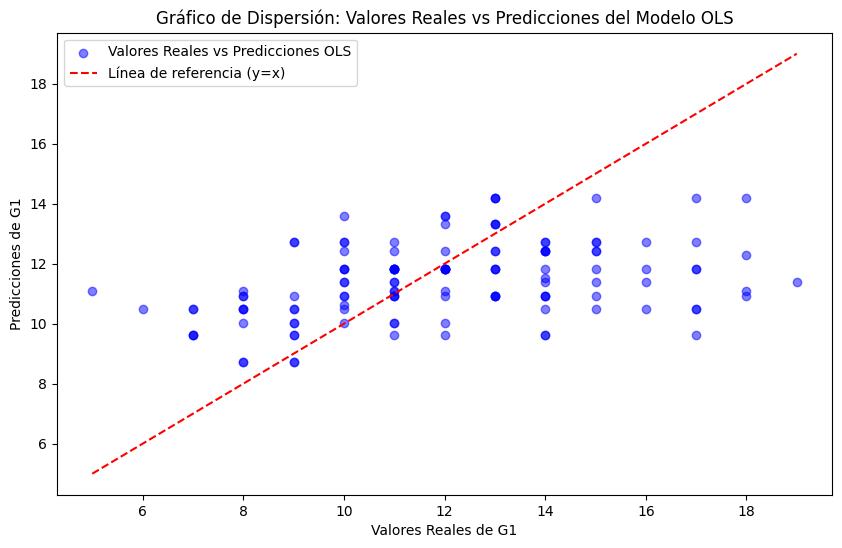

In [326]:
import matplotlib.pyplot as plt

# Crear gráfico de dispersión entre los valores reales de G1 y las predicciones del modelo OLS
plt.figure(figsize=(10, 6))

# Gráfico de dispersión de valores reales de G1 vs predicciones
plt.scatter(y_test, predicciones_test, alpha=0.5, color='blue', label="Valores Reales vs Predicciones OLS")

# Línea de referencia y=x
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Línea de referencia (y=x)')

# Añadir título y etiquetas de los ejes
plt.title('Gráfico de Dispersión: Valores Reales vs Predicciones del Modelo OLS')
plt.xlabel('Valores Reales de G1')
plt.ylabel('Predicciones de G1')

# Añadir leyenda
plt.legend()

# Mostrar gráfico
plt.show()


#### Análisis de los Resultados:


##### 1. **Durbin-Watson:**
   - **Valor:** 2.041
   - **Interpretación:** El valor de **Durbin-Watson** está muy cerca de 2, lo cual sugiere que **no hay autocorrelación** significativa en los residuos del modelo. Esto es una buena señal, ya que la autocorrelación podría indicar que los errores del modelo están relacionados entre sí, lo que afecta la validez de los resultados.

---

##### 2. **Jarque-Bera (JB) y Prob(JB):**
   - **Prob(JB):** 0.00268
   - **Interpretación:** La **prueba de Jarque-Bera** tiene un p-valor por debajo de 0.05, lo que indica que se **rechaza la hipótesis nula** de que los residuos tienen una distribución normal. Esto sugiere que los residuos del modelo no son perfectamente normales, aunque la normalidad de los residuos no siempre es un problema grave, especialmente en datasets grandes.
   
---

##### 3. **Kurtosis:**
   - **Valor:** 3.738
   - **Interpretación:** El valor de **kurtosis** es ligeramente mayor que 3, lo que indica que los residuos tienen colas más pesadas de lo que se esperaría en una distribución normal. Esto sugiere la presencia de algunos valores atípicos, pero la diferencia con respecto a 3 no es extremadamente preocupante. Esto indica cierta propensión a tener valores extremos en los residuos, pero no de manera alarmante.

---

##### 4. **Número de condición (Cond. No):**
   - **Valor:** 6.18
   - **Interpretación:** El número de condición evalúa la **multicolinealidad** entre las variables independientes. Un valor superior a 30 podría indicar un problema grave de multicolinealidad. En tu caso, el valor es **6.18**, lo que indica que **no hay problemas significativos de multicolinealidad** entre las variables, lo que es una buena señal.

---

##### 5. **Prueba de Breusch-Pagan para Heterocedasticidad:**
   - **LM-Stat:** 4.575
   - **LM-Test p valor:** 0.20567
   - **F-Stat:** 1.5268
   - **F-Test p valor:** 0.2066
   - **Interpretación:** El **p-valor** de la prueba de **Breusch-Pagan** es mayor que 0.05, lo que indica que **no hay evidencia suficiente para rechazar la hipótesis nula de homocedasticidad**. En otras palabras, no se detecta heterocedasticidad en este modelo. Esto significa que la varianza de los residuos es **constante**, lo que cumple con uno de los supuestos de la regresión lineal. Es una señal positiva, ya que la heterocedasticidad puede distorsionar las estimaciones de los coeficientes y sus errores estándar.

---

#### **Conclusiones Generales:**

1. **Autocorrelación:** No hay autocorrelación en los residuos (Durbin-Watson cerca de 2).
2. **Normalidad de los residuos:** Las pruebas de **Jarque-Bera** sugieren que los residuos no siguen una distribución normal, pero esto no siempre afecta negativamente el rendimiento predictivo del modelo, sobre todo en datasets grandes.
3. **Kurtosis y Asimetría:** Los residuos tienen colas más pesadas de lo que esperaría en una distribución normal, lo que sugiere la presencia de algunos valores atípicos.
4. **Multicolinealidad:** No se detectan problemas importantes de multicolinealidad entre las variables independientes.
5. **Heterocedasticidad:** No hay evidencia de heterocedasticidad, lo que significa que los residuos tienen una varianza constante.



### **2. Regresión logistica de G1,G2 y G3 para conocer si pasa el curso**

In [449]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

# Crear la nueva columna 'total_score' que suma G1, G2 y G3
df_combined_encoded['total_score'] = df_combined_encoded['G1'] + df_combined_encoded['G2'] + df_combined_encoded['G3']

# Crear la columna binaria 'pass_course' (1 si la suma es >= 40, 0 si no)
df_combined_encoded['pass_course'] = (df_combined_encoded['total_score'] >= 40).astype(int)

# Definir la variable dependiente 'y'
y = df_combined_encoded['pass_course']

# Seleccionar la característica
X = df_combined_encoded[['studytime','higher_yes','Medu']]

# Agregar la constante a las características
X = sm.add_constant(X)

# Crear y ajustar el modelo de regresión logística
logit_model = sm.Logit(y, X)
result_logit = logit_model.fit()

# Imprimir el resumen del modelo
print(result_logit.summary())

# Realizar predicciones de probabilidad
y_pred_prob = result_logit.predict(X)

# Cambiar el umbral para la clasificación (0.4)
y_pred = (y_pred_prob >= 0.4).astype(int)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y, y_pred)
conf_matrix = confusion_matrix(y, y_pred)

# Mostrar la exactitud y la matriz de confusión
print(f"\nExactitud del modelo de regresión logística: {accuracy * 100:.2f}%")
print("Matriz de confusión:")
print(conf_matrix)



Optimization terminated successfully.
         Current function value: 0.523611
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:            pass_course   No. Observations:                  649
Model:                          Logit   Df Residuals:                      645
Method:                           MLE   Df Model:                            3
Date:                Tue, 08 Oct 2024   Pseudo R-squ.:                  0.1132
Time:                        02:38:14   Log-Likelihood:                -339.82
converged:                       True   LL-Null:                       -383.19
Covariance Type:            nonrobust   LLR p-value:                 1.101e-18
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.9182      1.056     -5.606      0.000      -7.987      -3.849
studytime      0.5023      0.

In [450]:
# Calcular el valor AUC usando las probabilidades predichas
auc_value = roc_auc_score(y, y_pred)

# Mostrar el valor de AUC
print(f"El valor de AUC es: {auc_value:.2f}")


El valor de AUC es: 0.63


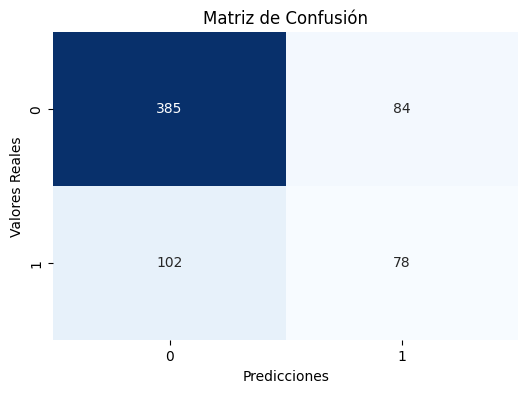

In [451]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.show()


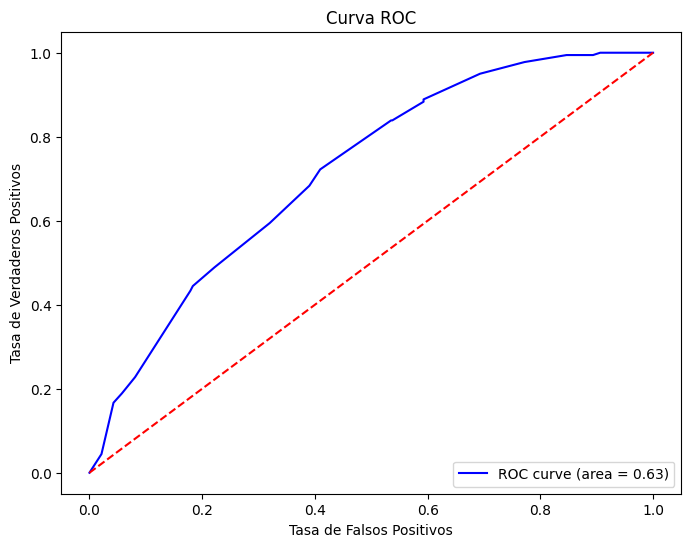

In [452]:
# Calcular la curva ROC
fpr, tpr, _ = roc_curve(y, y_pred_prob)
roc_auc = auc_value  # Reutilizar el AUC previamente calculado

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()


#### Analisis

**-Exactitud y AUC:** La exactitud del 71.34% y un AUC de 0.63 son indicadores de que el modelo tiene cierta capacidad predictiva, aunque no es excelente. Existen varios falsos negativos y falsos positivos, lo cual afecta la calidad general del modelo.

**-Variables Significativas:** Los coeficientes y sus valores p muestran que studytime, higher_yes y Medu son variables importantes para la predicción de aprobar el curso. El impacto del higher_yes sugiere que el deseo de seguir estudios superiores es un fuerte predictor del éxito en el curso.

**-Necesidad de Mejora:** El Pseudo R-squared de 0.1132 indica que el modelo no explica gran parte de la variabilidad en los resultados, lo cual sugiere que podrían añadirse más variables para mejorar la capacidad predictiva. Asimismo, un AUC de 0.63 implica que se debe seguir buscando mejoras para aumentar la capacidad del modelo de diferenciar entre clases.